# Amazon Review Classification

### Aim
Classify Amazon Reviews into 1 star or 5 star categories based off the text content in the reviews.

## Imports

In [2]:
%matplotlib inline

import sqlite3
import json
import csv
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

##Importing the data

In [5]:
df = pd.read_json('/Users/divyabharti/Downloads/cmpe256/Final/review.json', lines=True)

In [6]:
df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600
5,0000031887,"[0, 0]",4,I received this today and I'm not a fan of it ...,"03 31, 2014",A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,1396224000
6,0000031887,"[0, 0]",5,Bought this as a backup to the regular ballet ...,"05 3, 2014",A16GFPNVF4Y816,design maven,Great for dress-up and for ballet practice,1399075200
7,0000031887,"[0, 0]",5,Great tutu for a great price. It isn't a &#34;...,"12 23, 2012",A2M2APVYIB2U6K,Jamie P.,Great value,1356220800
8,0000031887,"[0, 0]",4,"My daughter liked this, and it with her costum...","11 10, 2013",A1NJ71X3YPQNQ9,JBerger,Good,1384041600
9,0000031887,"[7, 8]",5,For what I paid for two tutus is unbeatable an...,"10 7, 2012",A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",WOW !! ..is all I have to say!,1349568000


## New Dataframe having only helpful attribute and productID

In [7]:
helpfulness = df[['helpful','asin']]

In [8]:
helpfulness

,helpful,asin
0,"[0, 0]",0000031887
1,"[0, 0]",0000031887
2,"[0, 0]",0000031887
3,"[0, 0]",0000031887
4,"[0, 0]",0000031887
5,"[0, 0]",0000031887
6,"[0, 0]",0000031887
7,"[0, 0]",0000031887
8,"[0, 0]",0000031887
9,"[7, 8]",0000031887


In [9]:
df2 = pd.DataFrame(helpfulness)

In [10]:
df2[['helpful','total']] = pd.DataFrame(df2.helpful.values.tolist(), index=df2.index)
dfhelpful = df2[['asin', 'helpful','total']]

In [11]:
dfhelpful

,asin,helpful,total
0,0000031887,0,0
1,0000031887,0,0
2,0000031887,0,0
3,0000031887,0,0
4,0000031887,0,0
5,0000031887,0,0
6,0000031887,0,0
7,0000031887,0,0
8,0000031887,0,0
9,0000031887,7,8


In [12]:

dfNew = df.drop('helpful',1)

In [13]:
frames = [dfNew, dfhelpful]

In [14]:
result = dfNew.join(dfhelpful[['helpful','total']])

In [19]:
result.to_csv('reviews.csv', sep=',', header=False,index=False)
result

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,0000031887,5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,0,0
1,0000031887,5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,0,0
2,0000031887,5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,0,0
3,0000031887,5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,0,0
4,0000031887,5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,0,0
5,0000031887,4,I received this today and I'm not a fan of it ...,"03 31, 2014",A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,1396224000,0,0
6,0000031887,5,Bought this as a backup to the regular ballet ...,"05 3, 2014",A16GFPNVF4Y816,design maven,Great for dress-up and for ballet practice,1399075200,0,0
7,0000031887,5,Great tutu for a great price. It isn't a &#34;...,"12 23, 2012",A2M2APVYIB2U6K,Jamie P.,Great value,1356220800,0,0
8,0000031887,4,"My daughter liked this, and it with her costum...","11 10, 2013",A1NJ71X3YPQNQ9,JBerger,Good,1384041600,0,0
9,0000031887,5,For what I paid for two tutus is unbeatable an...,"10 7, 2012",A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",WOW !! ..is all I have to say!,1349568000,7,8


## Loading csv to SQLite
 Fetch the score and recommendation summary using SQL queries

In [20]:
class csvrd(object):
    def csvFile(self):

        self.readFile('reviews.csv')

    def readFile(self, filename):
        conn = sqlite3.connect('amazonReviews.db')
        cur = conn.cursor() 
        cur.execute("""CREATE TABLE IF NOT EXISTS amazonReviews(asin INT,overall INT,reviewText varchar,reviewTime INTEGER, reviewerID varchar,reviewerName varchar,summary varchar,unixReviewTime INTEGER,helpful INT,total INT)""")
        filename.encode('utf-8')
        print ("Amazon Reviews table executed")
        with open(filename) as f:
            reader = csv.reader(f)
            for field in reader:
                cur.execute("INSERT INTO amazonReviews VALUES (?,?,?,?,?,?,?,?,?,?);", field)

        print ("CSV Loaded into SQLite")
        conn.commit()
        conn.close()

c = csvrd().csvFile()

Amazon Reviews table executed
CSV Loaded into SQLite


## Reading the data from SQLite

In [21]:
con = sqlite3.connect('amazonReviews.db')

pd.read_sql_query("SELECT * FROM amazonReviews LIMIT 5", con)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,31887,5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,0,0
1,31887,5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,0,0
2,31887,5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,0,0
3,31887,5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,0,0
4,31887,5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,0,0


In [22]:
reviews = pd.read_sql_query("""
SELECT 
  overall, 
  summary, 
  helpful, 
  total
FROM amazonReviews 
WHERE overall != 3""", con)

In [23]:

#display data
reviews.head(5)

,overall,summary,helpful,total
0,5,Great tutu- not cheaply made,0,0
1,5,Very Cute!!,0,0
2,5,I have buy more than one,0,0
3,5,"Adorable, Sturdy",0,0
4,5,Grammy's Angels Love it,0,0


In [24]:
reviews["sentiment"] = reviews["overall"].apply(lambda score: "positive" if score > 3 else "negative")
reviews["usefulScore"] = (reviews["helpful"]/reviews["total"]).apply(lambda n: "useful" if n > 0.8 else "useless")

reviews.head(5)

,overall,summary,helpful,total,sentiment,usefulScore
0,5,Great tutu- not cheaply made,0,0,positive,useless
1,5,Very Cute!!,0,0,positive,useless
2,5,I have buy more than one,0,0,positive,useless
3,5,"Adorable, Sturdy",0,0,positive,useless
4,5,Grammy's Angels Love it,0,0,positive,useless


In [25]:
reviews[reviews.overall == 5].head(5)

,overall,summary,helpful,total,sentiment,usefulScore
0,5,Great tutu- not cheaply made,0,0,positive,useless
1,5,Very Cute!!,0,0,positive,useless
2,5,I have buy more than one,0,0,positive,useless
3,5,"Adorable, Sturdy",0,0,positive,useless
4,5,Grammy's Angels Love it,0,0,positive,useless


In [26]:
reviews[reviews.overall == 1].head(5)

,overall,summary,helpful,total,sentiment,usefulScore
16,1,Never GOT IT....,0,0,negative,useless
30,1,DO NOT BUY IF YOU EVER WANT TO RESELL IT.,24,31,negative,useless
67,1,WHAT!?,0,2,negative,useless
106,1,buckles did not match my luggage,2,5,negative,useless
119,1,Diego,2,3,negative,useless


## Feature extraction from reviewsText
Assign new dimension to each word and give the word counts

In [27]:
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

reviews["summaryClean"] = reviews["summary"].apply(cleanReviews)

train, test = train_test_split(reviews, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

198601 items in training data, 49651 in test data


## Using TfidfTransformer().fit_transofrm
to fit the train and test data

In [28]:
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

## Multinomial Naïve Bayes learning method

In [30]:
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

## Bernoulli Naïve Bayes learning method

In [31]:
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

## Logistic regression learning method

In [32]:
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

## Results

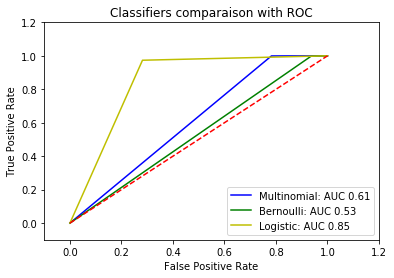

In [33]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualize the accuracy, recall and f1-score for Logistic Regression

In [34]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.76      0.72      0.74      5255
   negative       0.97      0.97      0.97     44396

avg / total       0.95      0.95      0.95     49651



In [35]:
accuracy_score(y_test, prediction['Logistic'])

0.94654689734345732

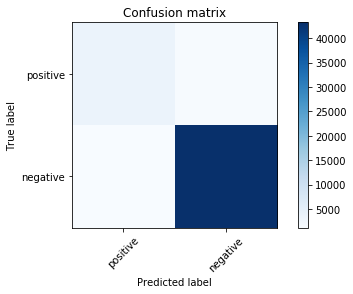

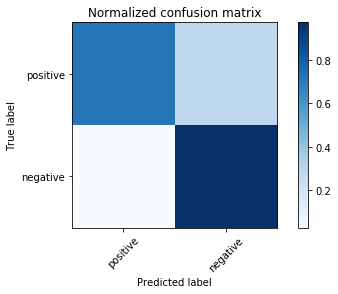

In [36]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

## Visualize the accuracy, recall and f1-score for Bernoulli

In [37]:
print(metrics.classification_report(y_test, prediction['Bernoulli'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.73      0.06      0.12      5255
   negative       0.90      1.00      0.95     44396

avg / total       0.88      0.90      0.86     49651



In [38]:
accuracy_score(y_test, prediction['Bernoulli'])

0.89849147046383759

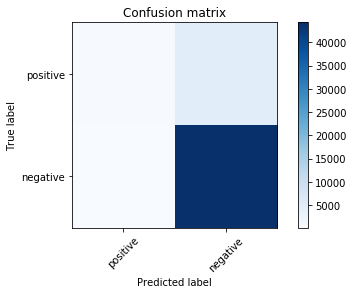

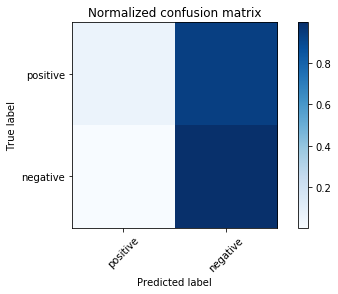

In [39]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

## Visualize the accuracy, recall and f1-score for Naive Bayes Multinomial

In [40]:
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.97      0.22      0.36      5255
   negative       0.92      1.00      0.96     44396

avg / total       0.92      0.92      0.89     49651



In [41]:
accuracy_score(y_test, prediction['Multinomial'])

0.91649715010775212

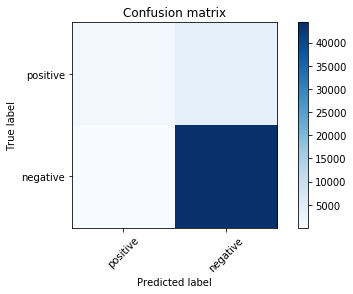

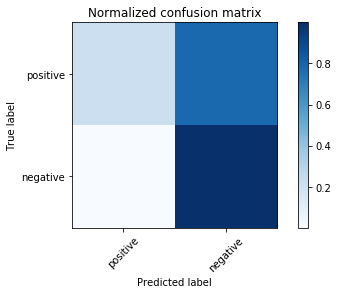

In [42]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

## Displaying words depicting the best and worst features¶
using Logistic Model since it gave the best results

In [43]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')

,feature,coefficient
309989,not,-27.808893
528709,worst,-27.575622
63206,broke,-24.781745
434680,terrible,-24.438998
34295,awful,-23.975669
349117,poor,-22.424192
312032,not good,-22.269024
213827,horrible,-21.572028
118019,disappointing,-21.117868
483944,uncomfortable,-20.428539


## Testing the sentiments of few reviews

In [44]:
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))

testSentiments(logreg, "Heavenly Highway Hymns")
testSentiments(logreg, "Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.")
testSentiments(logreg, "Nasty smelling shampoo!.")

Sample estimated as POSITIVE: negative prob 0.001954, positive prob 0.998046
Sample estimated as NEGATIVE: negative prob 0.996274, positive prob 0.003726
Sample estimated as NEGATIVE: negative prob 0.962797, positive prob 0.037203
